In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import gensim

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [2]:
data = pd.read_csv('only_translated.txt')
data = data['Translated'].dropna()

In [3]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

In [4]:
# Word Clean Part

# function to remove stopwords
STOPWORDS = stopwords.words('english')
 
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text

# function to conduct lemmatization for noun and adjective woprd
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [5]:
# tokenize the data
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))

In [7]:
# conduct lemmatization
data_2 = lemmatization(tokenized_data)

In [8]:
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(data_2)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in data_2]
 
# Check the corpus
print(corpus[20])

[(6, 1), (22, 1), (81, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1)]


In [9]:
NUM_TOPICS = 20

# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 
# Build the LSI model
lsa_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [10]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))

LDA Model:
Topic #0: 0.206*"traffic" + 0.201*"waze" + 0.043*"slow" + 0.034*"comment" + 0.029*"toll" + 0.029*"android" + 0.027*"practical" + 0.026*"road" + 0.026*"full" + 0.023*"highway"
Topic #1: 0.082*"user" + 0.077*"much" + 0.052*"bug" + 0.046*"report" + 0.043*"correct" + 0.040*"account" + 0.032*"system" + 0.026*"accuracy" + 0.025*"icon" + 0.024*"favorite"
Topic #2: 0.423*"map" + 0.078*"well" + 0.041*"information" + 0.033*"apple" + 0.022*"clear" + 0.020*"friend" + 0.020*"recommend" + 0.019*"date" + 0.018*"hand" + 0.014*"ad"
Topic #3: 0.334*"excellent" + 0.119*"awesome" + 0.091*"point" + 0.068*"cool" + 0.062*"travel" + 0.056*"error" + 0.027*"line" + 0.021*"light" + 0.016*"friendly" + 0.016*"town"
Topic #4: 0.224*"navigation" + 0.160*"lot" + 0.057*"feature" + 0.056*"offline" + 0.048*"amazing" + 0.044*"turn" + 0.029*"blue" + 0.028*"fine" + 0.021*"improvement" + 0.018*"meter"
Topic #5: 0.107*"phone" + 0.105*"new" + 0.074*"version" + 0.064*"screen" + 0.038*"open" + 0.031*"old" + 0.028*"li

In [11]:
print("LSA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsa_model.print_topic(idx, 10))

LSA Model:
Topic #0: 0.641*"good" + 0.575*"app" + 0.280*"map" + 0.162*"time" + 0.132*"route" + 0.128*"use" + 0.101*"great" + 0.089*"update" + 0.085*"navigation" + 0.078*"traffic"
Topic #1: -0.760*"good" + 0.515*"app" + 0.216*"map" + 0.135*"time" + 0.120*"great" + 0.102*"route" + 0.088*"update" + 0.072*"use" + 0.061*"road" + 0.057*"traffic"
Topic #2: 0.678*"brother" + 0.424*"comment" + 0.346*"use" + -0.286*"app" + 0.284*"map" + 0.145*"day" + 0.135*"fire" + 0.133*"red" + 0.077*"easy" + 0.046*"time"
Topic #3: -0.660*"brother" + 0.444*"comment" + 0.365*"use" + 0.307*"map" + -0.265*"app" + -0.130*"fire" + -0.127*"red" + -0.121*"day" + 0.082*"easy" + 0.039*"time"
Topic #4: -0.658*"map" + 0.554*"comment" + 0.369*"app" + 0.230*"use" + -0.122*"route" + -0.096*"time" + -0.068*"update" + -0.065*"road" + -0.052*"application" + 0.048*"great"
Topic #5: 0.518*"route" + 0.503*"time" + -0.440*"map" + -0.249*"app" + 0.179*"road" + 0.178*"traffic" + 0.133*"update" + 0.126*"application" + 0.105*"waze" + 0

In [12]:
bow = dictionary.doc2bow(clean_text('Can comments be used? ? ? How can I not use it?'))
 
print(lsa_model[bow])
 
print(lda_model[bow])

[(0, 0.1280448836429215), (1, 0.0717133192612804), (2, 0.3459890312350494), (3, 0.3653883556229874), (4, 0.2303936840068959), (5, -0.03562514232104361), (6, -0.7702503515291939), (7, -0.04599183582243753), (8, -0.029029750199143476), (9, -0.007185015928922691), (10, -0.020312018315379897), (11, -0.0112474557574865), (12, -0.009760438530742259), (13, -0.0052901756647311645), (14, 0.0024106290259257096), (15, 0.0016639226525906711), (16, 0.010796914559613761), (17, 0.029405946274041084), (18, -0.01621039860003634), (19, -0.0009760840545625242)]
[(0, 0.025000015), (1, 0.025000015), (2, 0.025000015), (3, 0.025000015), (4, 0.025000015), (5, 0.025000015), (6, 0.025000015), (7, 0.025000015), (8, 0.025000015), (9, 0.025000015), (10, 0.025000015), (11, 0.025000015), (12, 0.025000015), (13, 0.025000015), (14, 0.025000015), (15, 0.025000015), (16, 0.025000015), (17, 0.5249997), (18, 0.025000015), (19, 0.025000015)]


In [37]:
# Transfer both model to document-topic matrix with corresponding probability
LDA_Matrix = []

for bow in corpus:
    LDA_pro = []
    for index, probability in lda_model[bow]:
        LDA_pro.append(probability)
    
    LDA_Matrix.append(LDA_pro)

In [38]:
# Transfer both model to document-topic matrix with corresponding probability
LSA_Matrix = []

for bow in corpus:
    LSA_pro = []
    for index, probability in lsa_model[bow]:
        LSA_pro.append(probability)
    
    LSA_Matrix.append(LSA_pro)

In [39]:
data = pd.read_csv('translated_data.csv')
data = data[pd.notnull(data['Translated'])]

In [40]:
rating = data['Rating']
data = data['Translated']

## Topic Selection

In [41]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression

### LDA

In [42]:
headers = np.arange(20)
df = pd.DataFrame(LDA_Matrix, columns=headers)
df['rating'] = rating
df = df.dropna()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,rating
0,0.524998,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,5.0
1,0.016667,0.016667,0.016667,0.016667,0.016667,0.349992,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,1.0
3,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.332726,0.010000,0.010000,0.010000,...,0.010000,0.209999,0.010000,0.010000,0.287275,0.010000,0.010000,0.010000,0.010000,5.0
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.209992,0.010000,0.610004,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.0
9,0.010000,0.010000,0.010000,0.010000,0.410003,0.010000,0.210003,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.209993,0.010000,0.010000,5.0


In [43]:
df.shape

(324765, 21)

In [44]:
y = df['rating']
x = df.drop(['rating'],axis=1)

In [45]:
# Feature selection
LR = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 101, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    cm_fs = fs.fit_transform(x, y)
    scores = abs(model_selection.cross_val_score(LR, cm_fs, y, cv=5, scoring='neg_mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

1 1.0580172480885153
6 1.0578986680933908
11 1.057819927543635
16 1.0577059368259853
21 1.0577059368259853
26 1.0576568280333543
31 1.057601118813622
36 1.0575148264499608
41 1.0574959313498757
46 1.0574715680432791
51 1.057476169957176
56 1.0574630023196658
61 1.0574859458568084
66 1.0574864922421792
71 1.0574849835529765
76 1.0575215854147806
81 1.0575238966647524
86 1.057524942065198
91 1.057538459828346
96 1.057551748532519


In [46]:
cm_feature = x.columns
optimal_percentile = int(np.where(results == results.min())[0])
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(percentiles[optimal_percentile]*len(cm_feature)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:56 

Optimal number of features:11 



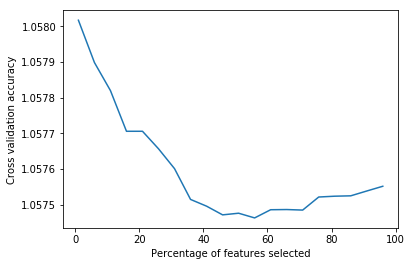

In [47]:
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)

In [48]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=96)
x_fs = fs.fit_transform(x, y)
for i in range(len(cm_feature)):
    if fs.get_support()[i]:
        print(cm_feature[i],'\t', fs.scores_[i] )

0 	 3.9819589295116495
1 	 13.89722787106807
2 	 32.06243030688316
3 	 28.05033894892897
4 	 0.025301493707939382
5 	 49.93013947984282
6 	 0.6933066105943315
7 	 70.32648012196609
8 	 187.7949151309583
9 	 28.26587500865036
10 	 0.11173755442027575
11 	 13.240125826135618
12 	 2.6550226367970025
14 	 0.4851040642634076
15 	 46.99389106378023
16 	 12.418729405700605
17 	 1.593648712168749
18 	 7.805003518744354
19 	 0.663833932500669


In [49]:
from sklearn import preprocessing

In [50]:
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(x_fs)
data_norm = min_max_scaler.transform(x_fs)
data_norm[0]

array([0.64374781, 0.01875054, 0.01875014, 0.01875015, 0.01875015,
       0.01875014, 0.01875014, 0.01875014, 0.01875014, 0.01875014,
       0.01875015, 0.01875015, 0.01875014, 0.01875015, 0.01875014,
       0.01875015, 0.01875014, 0.01875016, 0.01875016])

In [51]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(data_norm, y, test_size=0.33, random_state=123)
LR = LinearRegression()
LR.fit(x_train_fs, y_train_fs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### LDA Feature Selection with Linear Regression Result

In [52]:
from sklearn import metrics
y_pred_fs = LR.predict(x_test_fs)

# MAE
print(metrics.mean_absolute_error(y_test_fs, y_pred_fs))
# MSE
print(metrics.mean_squared_error(y_test_fs, y_pred_fs))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs)))

1.0570917601389036
1.771042445244
1.3308051868113528


In [53]:
print ('Regression Coefficients: \n', LR.coef_)

Regression Coefficients: 
 [-0.02621223 -0.10274409 -0.12407025  0.06289692  0.01347483 -0.20530169
 -0.03716582  0.06562148 -0.26250509 -0.12568571  0.01832149 -0.07666346
  0.02692166  0.04657694  0.07632491  0.06946034 -0.01348178 -0.08679014
  0.031802  ]


## LSA

In [54]:
df = pd.DataFrame(LSA_Matrix, columns=headers)
df['rating'] = rating
df = df.dropna()

y = df['rating']
x = df.drop(['rating'],axis=1)

# Feature selection
LR = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 101, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    cm_fs = fs.fit_transform(x, y)
    scores = abs(model_selection.cross_val_score(LR, cm_fs, y, cv=5, scoring='neg_mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

1 1.088976399541762
6 1.0888512530007664
11 1.0885741634486208
16 1.0885228475550797
21 1.0885228475550797
26 1.0884047225649671
31 1.0882364964273252
36 1.0881328424450447
41 1.0881161812957394
46 1.088035874397895
51 1.0879511654235894
56 1.0879011898208846
61 1.0879037153831077
66 1.0877687699369545
71 1.0877855675142
76 1.0878225876224887
81 1.0877868753002997
86 1.08779731634541
91 1.0878029409990846
96 1.0878113890827514


In [55]:
cm_feature = x.columns
optimal_percentile = int(np.where(results == results.min())[0])
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(percentiles[optimal_percentile]*len(cm_feature)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:66 

Optimal number of features:13 



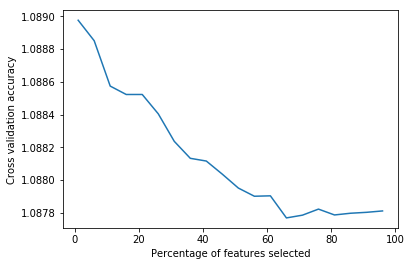

In [56]:
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)

In [57]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=96)
x_fs = fs.fit_transform(x, y)
for i in range(len(cm_feature)):
    if fs.get_support()[i]:
        print(cm_feature[i],'\t', fs.scores_[i] )

0 	 250.62252371255965
1 	 469.0405390073533
2 	 98.82480307757142
3 	 117.13164076511346
4 	 57.47246375745098
5 	 44.696062354280045
6 	 1.5896475326597053
7 	 24.07691762469679
8 	 186.6972849490259
9 	 210.10806971626815
10 	 190.1589465301548
11 	 8.105817104015538
12 	 42.84904290059857
13 	 0.8237844832352549
14 	 8.411199779057936
15 	 55.007265914118335
16 	 46.51037361765508
17 	 50.66014368591676
18 	 1.293720115729899


In [58]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0,1)).fit(x_fs)
data_norm = min_max_scaler.transform(x_fs)
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(data_norm, y, test_size=0.33, random_state=123)
LR = LinearRegression()
LR.fit(x_train_fs, y_train_fs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### LSA Feature Selection with Linear Regression Result¶

In [59]:
from sklearn import metrics
y_pred_fs = LR.predict(x_test_fs)

# MAE
print(metrics.mean_absolute_error(y_test_fs, y_pred_fs))
# MSE
print(metrics.mean_squared_error(y_test_fs, y_pred_fs))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs)))

1.087921321240507
1.838572259650534
1.355939622420753


In [60]:
print ('Regression Coefficients: \n', LR.coef_)

Regression Coefficients: 
 [ -3.39449694  -4.22199043  -9.52949973 -13.38597806   5.32169287
  -2.16527296  -0.8487228   -0.70243086   0.77299687  -2.17950102
   1.18424808  -0.50771369  -0.91771828   0.01950765   0.69828719
   6.78278763  -1.19926709   5.09381653  -0.05375124]
